In [3]:
from RSI import addRSI
import pandas as pd
import yfinance as yf
from getDataFrame import getTickerDF
import seaborn as sns
import matplotlib.pyplot as plt

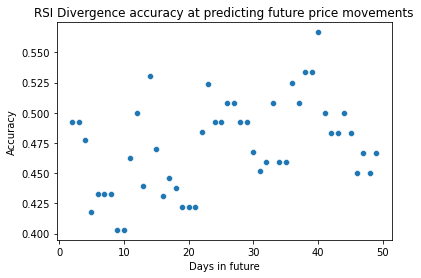

In [5]:
# Create dataframe with ticker data and RSI
s = yf.Ticker("MSFT")
df = s.history(period = "2y", i = "1d").loc[:, ["Open", "High", "Low", "Close", "Volume"]]
df = addRSI(df)

rsi = df["RSI"]

price = (df["High"] + df["Low"] + df["Close"])/3
rsidivergence = []

# Create RSI Divergence Calculator:
# If price increase and rsi decreases --> price will drop
# If price dcreases and rsi increases --> price will rise
for i in range(1,len(rsi)):
    if price[i] > price[i-1] and rsi[i] < rsi[i-1]:
        rsidivergence.append("Drop")
    elif price[i] < price[i-1] and rsi[i] > rsi[i-1]:
        rsidivergence.append("Rise")
    else:
        rsidivergence.append("None")

#Calculate accuracy of the RSI divergence indicator
days = []
accuracy = [] 

for i in range(2,50): #number of days in advance that you are predicting price change
    ts = 0 # true signals
    fs = 0 # false signals
    for j in range(0, len(rsidivergence)-i):
        if rsidivergence[j] == "Drop" and price[j+1] < price[j+1+i]: #Indicates drop but prices rise --> false signal
            fs += 1
        elif rsidivergence[j] == "Rise" and price[j+1] > price[j+1+i]: #Indicates rise but prices drop --> false signal            
            fs += 1 
        elif rsidivergence[j] == "Rise" and price[j+1] < price[j+1+i]: # Indicates rise and prices rise --> true signal
            ts += 1
        elif rsidivergence[j] == "Drop" and price[j+1] > price[j+1+i]: #Indicates drop and prices drop --> true signal
            ts += 1
    days.append(i)
    accuracy.append(ts/(ts+fs))

graph = sns.scatterplot(x=days, y = accuracy)
graph.set(xlabel = "Days in future", ylabel = "Accuracy", title = "RSI Divergence accuracy at predicting future price movements")
plt.show()

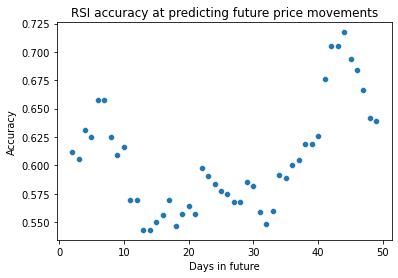

In [7]:
#Create RSI Signal
rsisignal = []
for i in range(len(rsi)):
    if rsi[i] < 30: #If RSI is less than 30 -> indicates the equity is oversold, price will correct itself and increase
        rsisignal.append("Oversold")
    elif rsi[i] > 70: #If RSI is greater than 70 -> indicates the equity is overbought; price will correct itself and decrease
        rsisignal.append("Overbought")
    else:
        rsisignal.append("Neutral")

days = []
accuracy = [] 
for i in range(2,50):
    ts = 0 #true signals
    fs = 0 #false signals
    for j in range(0, len(rsisignal)-i):
        if rsisignal[j] == "Overbought" and price[j] < price[j+i]: 
            ts += 1
        elif rsisignal[j] == "Oversold" and price[j] > price[j+i]:
            ts += 1
        elif rsisignal[j] == "Oversold" and price[j] < price[j+i]:
            fs += 1
        elif rsisignal[j] == "Overbought" and price[j] > price[j+i]:
            fs += 1
    days.append(i)
    accuracy.append(ts/(ts+fs))

graph2 = sns.scatterplot(x=days, y = accuracy)
graph2.set(xlabel = "Days in future", ylabel = "Accuracy", title = "RSI accuracy at predicting future price movements")
plt.show()